## Observations and Insights 

1) Capomulin and Ramicane are the treatments with the highest number of mice treated.
2) Capomulin is the treatment with the lowest final tumor volume.
3) There is a high positive correlation between mouse weight versus average tumor volume.



In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [18]:
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [19]:
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [20]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata['Mouse ID'].unique())
number_of_mice

249

In [21]:
# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

sorted_study_results_df = study_results.sort_values(['Mouse ID'], ascending=True)
study_results_df = sorted_study_results_df.reset_index(drop=True)

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
largo =len(study_results_df)
for i in range (0,largo-1): 
    if study_results_df.loc[i+1][1] == study_results_df.loc[i][1]:
        if (study_results_df.loc[i+1][0] == study_results_df.loc[i][0]):
            NOMBRE =study_results_df.loc[i+1][0]


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
index_names = study_results_df[study_results_df['Mouse ID'] == NOMBRE].index 
duplicate_mouse_ID_frame = study_results_df.loc[index_names, :]
dup_mouse_ID = duplicate_mouse_ID_frame.sort_values(['Timepoint'], ascending=True)
duplicate_mouse_ID = dup_mouse_ID.reset_index(drop=True)


index1_names = mouse_metadata[mouse_metadata['Mouse ID'] == NOMBRE].index
dup_mouse_DATA =mouse_metadata.loc[index1_names, :]



data_duplicate_mouse_ID=pd.merge(dup_mouse_DATA,duplicate_mouse_ID,on='Mouse ID',how ='outer')
data_duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_df.drop(index_names, inplace = True) 
mouse_metadata.drop(index1_names, inplace = True) 

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results_df,on='Mouse ID',how ='outer')

# Display the data table for preview
combined_df.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,5,38.825898,0
1,k403,Ramicane,Male,21,16,15,34.223992,1
2,k403,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,25,33.464577,1
4,k403,Ramicane,Male,21,16,30,31.099498,1
5,k403,Ramicane,Male,21,16,35,26.546993,1
6,k403,Ramicane,Male,21,16,10,35.014271,1
7,k403,Ramicane,Male,21,16,40,24.365505,1
8,k403,Ramicane,Male,21,16,0,45.000000,0
9,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = len(combined_df['Mouse ID'].unique())
new_number_of_mice

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics=combined_df.groupby(['Drug Regimen'])
mean =summary_statistics['Tumor Volume (mm3)'].mean()
median =summary_statistics['Tumor Volume (mm3)'].median()
std =summary_statistics['Tumor Volume (mm3)'].std()
sem = summary_statistics['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tabla = pd.merge(mean,median, on='Drug Regimen')
tabla = tabla.rename(columns={"Tumor Volume (mm3)_x":"Mean", "Tumor Volume (mm3)_y":"Median"})
tabla2 = pd.merge(std,sem, on='Drug Regimen')
tabla2 = tabla2.rename(columns={"Tumor Volume (mm3)_x":"Std dev", "Tumor Volume (mm3)_y":"SEM"})

Summ_statistics=pd.merge(tabla,tabla2,on='Drug Regimen')
Summ_statistics


,Mean,Median,Std dev,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

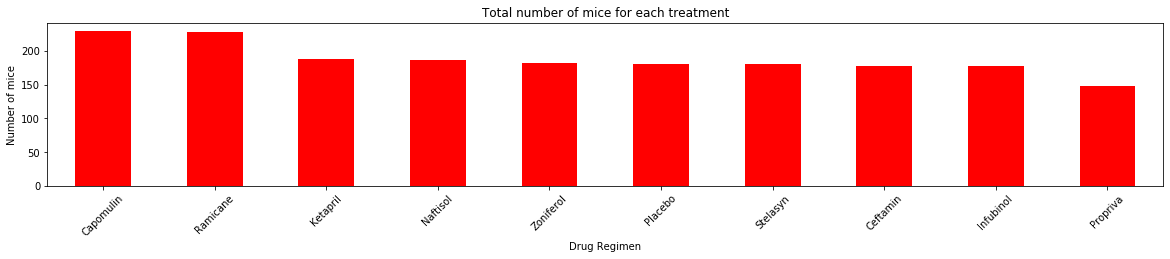

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_counts = combined_df["Drug Regimen"].value_counts()

#strongest_pokemon_df = mice.sort_values(["Total"], ascending=False)
plt.figure(figsize=(20,3))
mice_counts.plot(kind="bar", facecolor="r", rot=45)
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")


plt.show()



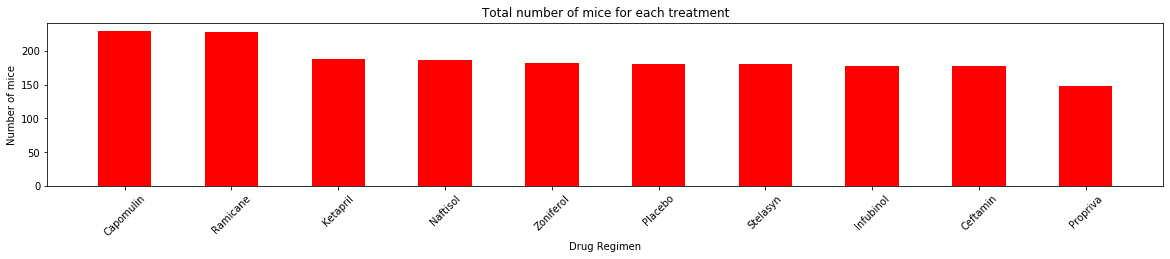

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(combined_df['Drug Regimen'].value_counts()))
lista = ['Capomulin', 'Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Infubinol','Ceftamin','Propriva']
tick_locations = [value+0.25 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_counts, color='r',  alpha=1.0, width=0.5, align="edge")
plt.xticks(tick_locations,lista, rotation=45)
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()



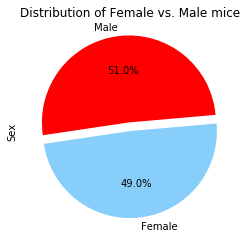

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["red","lightskyblue"]
explode = (0.1, 0)
combined_df['Sex'].value_counts().plot(kind='pie',explode=explode,colors=colors,autopct='%1.1f%%', startangle=5, fontsize=10)

plt.title("Distribution of Female vs. Male mice")
plt.show()



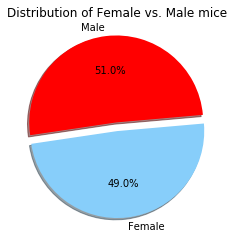

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = combined_df['Sex'].unique()
sizes = combined_df['Sex'].value_counts()
colors = ["red","lightskyblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=5)
plt.title("Distribution of Female vs. Male mice")
plt.show()





## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens=combined_df.loc[(combined_df['Drug Regimen'] == "Ramicane") | (combined_df['Drug Regimen'] == "Capomulin")| 
                    (combined_df['Drug Regimen'] == "Infubinol") | (combined_df['Drug Regimen'] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
Max_Timepoint = four_regimens.loc[four_regimens.groupby('Mouse ID')['Timepoint'].idxmax()]

Max_Timepoint_df = Max_Timepoint.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})
Max_Timepoint_df.to_csv("listado.csv", index=True)
Max_Timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume,Metastatic Sites
462,a203,Infubinol,Female,20,23,45,67.973419,2
466,a251,Infubinol,Female,21,25,45,65.525743,1
492,a275,Ceftamin,Female,20,28,45,62.999356,3
319,a411,Ramicane,Male,3,22,45,38.407618,1
426,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1825,y769,Ceftamin,Female,6,27,45,68.594745,4
116,y793,Capomulin,Male,17,17,45,31.896238,2
1833,y865,Ceftamin,Male,23,26,45,64.729837,3
81,z578,Ramicane,Male,11,16,45,30.638696,0


In [31]:
Max_Tumor_volume=Max_Timepoint_df[["Mouse ID", "Final Tumor Volume"]]
               
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined2_df=pd.merge(four_regimens,Max_Tumor_volume,on='Mouse ID',how ='right')
combined2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
1,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
2,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126
3,k403,Ramicane,Male,21,16,25,33.464577,1,22.050126
4,k403,Ramicane,Male,21,16,30,31.099498,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,5,49.273092,1,62.754451
810,z581,Infubinol,Female,24,25,20,51.807944,2,62.754451
811,z581,Infubinol,Female,24,25,45,62.754451,3,62.754451
812,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451


In [39]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
#across all four treatment regimens.

#Put treatments into a list for for loop (and later for plot labels)

list_treatment = ['Capomulin', 'Ceftamin','Infubinol','Ramicane']

print(' Drug Regimens:')
print(list_treatment)
print('------------------------------')

for regimen in list_treatment:
    print(f'Treatment: {regimen}')
    Tumor = Max_Timepoint_df[Max_Timepoint['Drug Regimen'] == regimen]
    quartiles = Tumor['Final Tumor Volume'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of Tumor Volume for {regimen} is: {lowerq}")
    print(f"The upper quartile of Tumor Volume for {regimen}is: {upperq}")
    print(f"The interquartile range of Tumor Volume for {regimen} is: {iqr}")
    print(f"The the median of Tumor Volume for {regimen}is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Maximum Value {combined2_df[combined2_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].max()}")
    print(f"Min Value {combined2_df[combined2_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].min()}")
    if upper_bound > combined2_df[combined2_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].max():
        print("Since Maximun value is less than upper bound, there are no outliers in the upper level")
    else:
        print("Since Maximun value is higher than upper bound, there are possible outliers in the upper level")
    if lower_bound < combined2_df[combined2_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].min():
        print("Since Minimum value is higher than lower bound, there are no outliers in the lower level")
    else:
        print("Since Minimun value is less than lower bound, there are possible outliers in the lower level")
    
    print('*********************************')
    
# Locate the rows which contain mice on each drug and get the tumor volumes  
# add subset 
# Determine outliers using upper and lower bounds
    

 Drug Regimens:
['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
------------------------------
Treatment: Capomulin
The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulinis: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The the median of Tumor Volume for Capomulinis: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Maximum Value 48.15820939
Min Value 23.34359787
Since Maximun value is less than upper bound, there are no outliers in the upper level
Since Minimum value is higher than lower bound, there are no outliers in the lower level
*********************************
Treatment: Ceftamin
The lower quartile of Tumor Volume for Ceftamin is: 48.72207785
The upper quartile of Tumor Volume for Ceftaminis: 64.29983003
The interquartile range of Tumor Volume for Ceftamin is: 15.577752179999997
The the median of Tumor Volume for

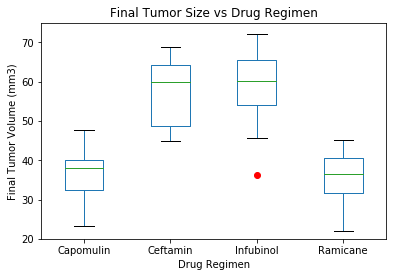

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Max_Timepoint_df.boxplot(by='Drug Regimen', column=['Final Tumor Volume'], grid=False, showfliers=True, sym='r')
plt.ylim(20,75)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Size vs Drug Regimen')
plt.suptitle(None)
plt.show()



## Line and Scatter Plots

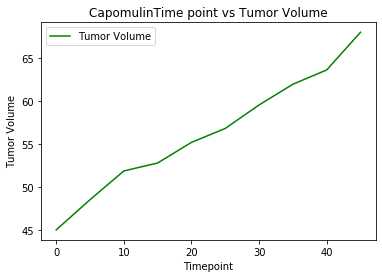

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

base =combined_df[combined_df['Mouse ID']=='a203'][['Timepoint','Tumor Volume (mm3)']]
base1 =base.sort_values(['Timepoint'], ascending=True)
x_axis=base1['Timepoint']
y_axis=base1['Tumor Volume (mm3)']

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(x_axis, y_axis, color="green", label="Tumor Volume")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")
plt.title("CapomulinTime point vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()



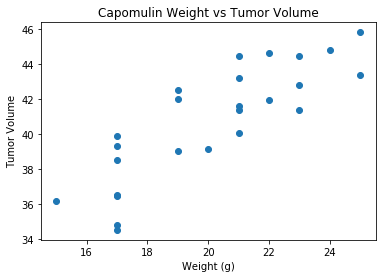

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_scatter = four_regimens[four_regimens['Drug Regimen'] == 'Capomulin']
Avg_Tumor_vol_capomulin =Capomulin_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Avg_Tumor_vol_capomulin = pd.DataFrame(Avg_Tumor_vol_capomulin)
Avg_Tumor_vol_capomulin = Avg_Tumor_vol_capomulin.rename(columns={'Tumor Volume (mm3)':'Avg Tumor Volume (mm3)'})
final =pd.merge(Avg_Tumor_vol_capomulin, mouse_metadata, on='Mouse ID',how='left')
final1=final.sort_values(['Weight (g)'], ascending=True)
final1

plt.scatter(final1.iloc[:,5],final1.iloc[:,1])
plt.title("Capomulin Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

In [43]:
matriz = final.corr()
matriz.unstack().sort_values()

Age_months              Weight (g)               -0.074396
Weight (g)              Age_months               -0.074396
Avg Tumor Volume (mm3)  Age_months                0.015190
Age_months              Avg Tumor Volume (mm3)    0.015190
Avg Tumor Volume (mm3)  Weight (g)                0.841936
Weight (g)              Avg Tumor Volume (mm3)    0.841936
Avg Tumor Volume (mm3)  Avg Tumor Volume (mm3)    1.000000
Age_months              Age_months                1.000000
Weight (g)              Weight (g)                1.000000
dtype: float64

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


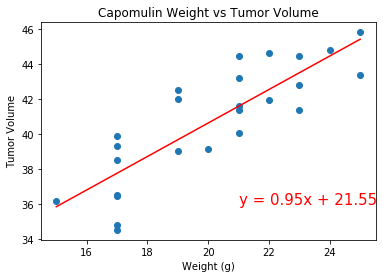

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

weight = final1.iloc[:,5]
tummor = final1.iloc[:,1]
correlation = st.pearsonr(weight,tummor)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tummor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tummor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.title("Capomulin Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")

print(f"The r-squared is: {rvalue**2}")
plt.show()